# Marketing Campaign Analysis Data

## About data

**Problem Identification**

The main idea of this project is to extract actionable insights from the given data of a company that improves their decision-making process. Furthermore, we want to provide the best possible predictive model for the marketing campaign of their new product which shows if a customer buys the new product or not and how much is the possibility of the purchase.

**Data Description**

The provided data is synthetic. So, it does not include any sensitive or real customer information.

* id: record ID
* target: target value (customer response to the marketing campaign)
* day: contact day in previous campaign
* month: contact month in previous campaign
* duration: contact duration in previous campaign
* contactId: contact ID
* age: age of the customer
* gender: customer gender
* job: customer occupation
* maritalStatus: customer marital status
* education: customer educational degree
* craditFailure: if the customer has a default credit
* accountBalance: customer account balance
* house: if the customer owns a house
* credit: if the customer has a credit
* contactType: contact media
* numberOfContacts: number of contacts during the current campaign
* daySinceLastCampaign: days after the last contact of the previous campaign
* numberOfContactsLastCampaign: number of contacts during the previous campaign
* lastCampaignResult: result of the previous campaign

[Get data](https://www.kaggle.com/datasets/khanimar/marketing-campaign-analysis-data/data)

Brainstormed questions: 
* How is the campaign performance currently?
* Which type of contact is effective?
* When is the campaign performance best?
* Define the customer profile.

## Import library and Read data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('campaign.csv', index_col = 'id')

In [3]:
data

,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
id,,,,,,,,,,,,,,,,,,,
432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432184725,yes,30,nov,1628,69542367,58,female,technical,married,highSchool,no,3399,no,no,landline,2,188.0,8,success
432147139,no,21,may,173,69542565,40,female,manager,single,secondarySchool,no,858,yes,no,unknown,1,NaN,0,unknown
432166958,no,17,nov,422,69543453,51,female,worker,married,highSchool,no,1414,yes,no,unknown,3,186.0,2,failure


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31480 entries, 432148809 to 432171709
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   target                        31480 non-null  object 
 1   day                           31480 non-null  int64  
 2   month                         31480 non-null  object 
 3   duration                      31480 non-null  int64  
 4   contactId                     31480 non-null  int64  
 5   age                           31480 non-null  int64  
 6   gender                        31480 non-null  object 
 7   job                           31480 non-null  object 
 8   maritalStatus                 31480 non-null  object 
 9   education                     31480 non-null  object 
 10  creditFailure                 31480 non-null  object 
 11  accountBalance                31480 non-null  int64  
 12  house                         31480 non-null  ob

As can be seen, the training data contains 31480 samples and 20 features in which 9 features have numerical values and the rest (11 features) are nominal.

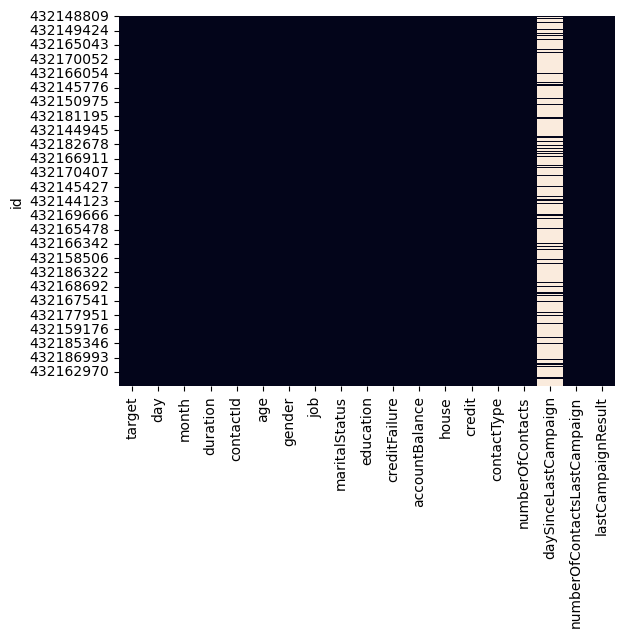

In [5]:
sns.heatmap(data.isnull(), cbar = False) 
plt.show()

In [6]:
data[data['daySinceLastCampaign'].isnull()]['numberOfContactsLastCampaign'].value_counts()

0    25742
Name: numberOfContactsLastCampaign, dtype: int64

In the dataset, Null values in the daySinceLastCampaign column, with corresponding zeros in the numberOfContactsLastCampaign column, indicate no previous campaign contact. Replace these Null values with -1 to signify "no contact in the previous campaign" for clearer data interpretation and analysis.

In [7]:
data['daySinceLastCampaign'].fillna(-1, inplace  = True)

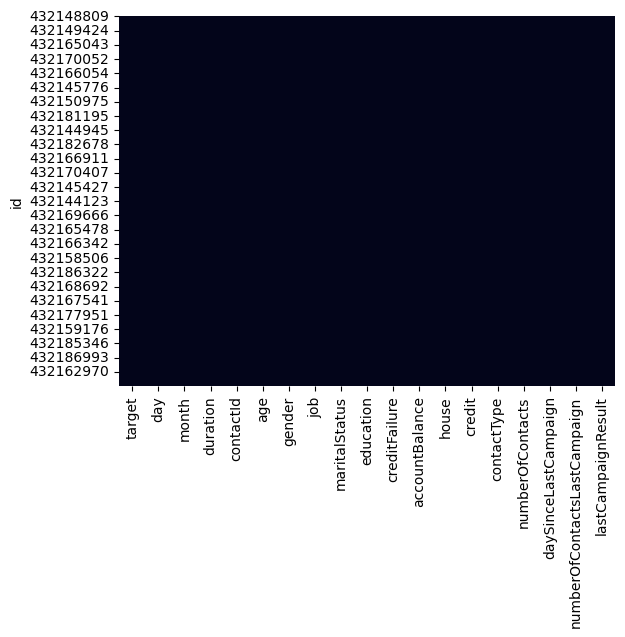

In [8]:
sns.heatmap(data.isnull(), cbar = False) 
plt.show()

Now, there are not any missing values 

## Campaign Performance

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31480 entries, 432148809 to 432171709
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   target                        31480 non-null  object 
 1   day                           31480 non-null  int64  
 2   month                         31480 non-null  object 
 3   duration                      31480 non-null  int64  
 4   contactId                     31480 non-null  int64  
 5   age                           31480 non-null  int64  
 6   gender                        31480 non-null  object 
 7   job                           31480 non-null  object 
 8   maritalStatus                 31480 non-null  object 
 9   education                     31480 non-null  object 
 10  creditFailure                 31480 non-null  object 
 11  accountBalance                31480 non-null  int64  
 12  house                         31480 non-null  ob

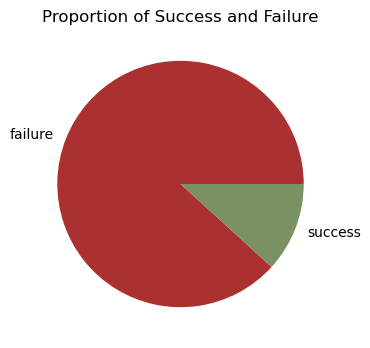

In [20]:
target = data['target'].value_counts()
color = ['#ab3131', '#799163']
label = ['failure', 'success']

fig = plt.figure(figsize=(6,4))
plt.pie(target, labels = label, colors = color)
plt.title('Proportion of Success and Failure')
plt.show()

The success rate of this campaign is very low.

### By type of contact

In [11]:
contact_type = data['contactType'].value_counts()
contact_type

cellPhone    20353
unknown       9079
landline      2048
Name: contactType, dtype: int64

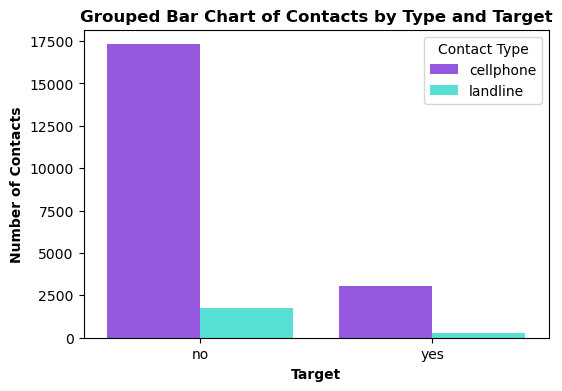

In [18]:
data.loc[data['contactType'] == 'cellPhone', 'ContactType'] = 'cellphone'
data.loc[data['contactType'] == 'landline', 'ContactType'] = 'landline'

plt.figure(figsize=(6,4))
sns.countplot(x='target', hue='ContactType', data=combined_data, palette=['#9342f5', '#42f5e9'])

plt.xlabel('Target', fontweight='bold')
plt.ylabel('Number of Contacts', fontweight='bold')
plt.title('Grouped Bar Chart of Contacts by Type and Target', fontweight='bold')

plt.legend(title='Contact Type')
plt.show()

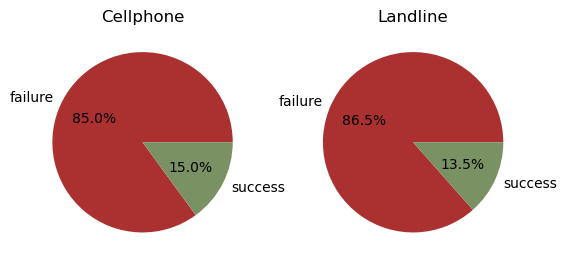

In [21]:
cellphone_pct = cellphone['target'].value_counts()
landline_pct = landline['target'].value_counts()

label = ['failure', 'success']

fig,(ax1, ax2) = plt.subplots(1,2) 
ax1.pie(cellphone_pct, colors = color, labels = label, autopct='%1.1f%%')
ax1.set_title('Cellphone') 

ax2.pie(landline_pct, colors = color, labels = label, autopct='%1.1f%%')
ax2.set_title('Landline')

plt.show()

The method of contacting customers does not significantly affect the campaign results.

### By time

In [22]:
data['month_no'] = data['month']
month_dict = {'jan': 1
              , 'feb': 2
              , 'mar': 3
              , 'apr': 4
              , 'may': 5
              , 'jun': 6
              , 'jul': 7
              , 'aug': 8
              , 'sep': 9
              , 'oct': 10 
              , 'nov': 11
              , 'dec': 12}

data['month_no'] = data['month_no'].map(month_dict)

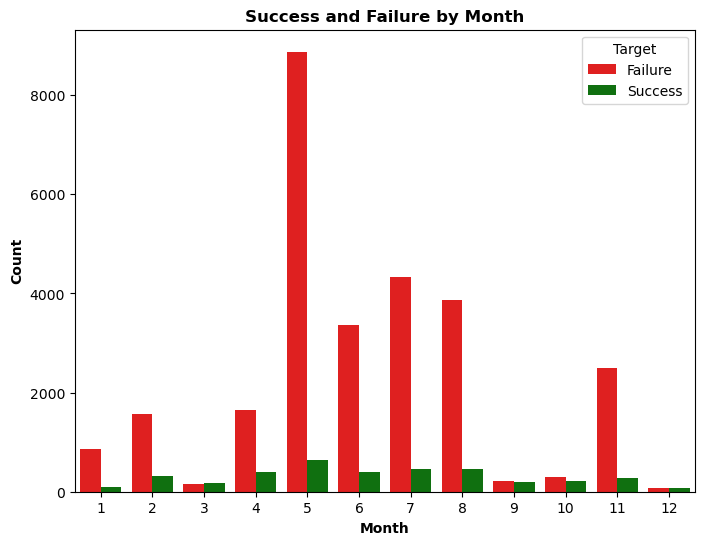

In [24]:
plt.figure(figsize= (8,6))
sns.countplot(x='month_no', hue='target', data=data, palette=['red', 'green'])

plt.title('Success and Failure by Month', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Target', labels=['Failure', 'Success'])
plt.xticks(rotation=0)

plt.show()

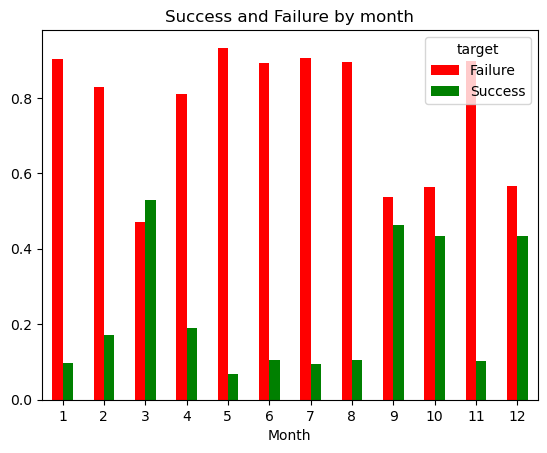

In [ ]:
# Vì số lượng contact ở mỗi tháng không giống nhau nên thay vì count thì tính tỉ lệ 
success_fail_rate = count_target.div(count_target.sum(axis = 1), axis = 0)
success_fail_rate.plot(kind = 'bar', width = 0.5, color=['red', 'green'])
plt.title('Success and Failure by month')
plt.xlabel('Month')
plt.xticks(rotation = 360)
plt.show()

May has the highest number of contacts but also the highest failure rate, followed by June, July, and August. November, January, and February have fewer contacts but also high failure rates.
March, September, October, and December have the fewest contacts but the success rates are high.

## Customers' profile

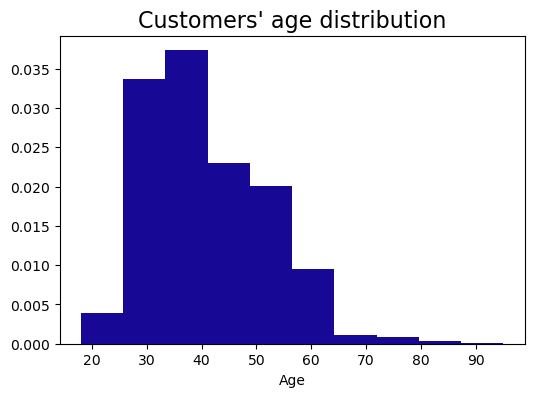

In [27]:
fig, ax = plt.subplots(figsize = (6,4))

plt.hist(data['age'], color = '#170996', density = True)
plt.title("Customers' age distribution", size = 16) 
# for direction in ['top', 'right', 'left']: 
#    ax.spines[direction].set_visible(False)
# ax.set_yticks([])
plt.xlabel('Age')
plt.show()

The majority of customers fall within the **27-55** years old range.

In [28]:
success = data[data['target'] == 'yes']['age']
fail = data[data['target'] == 'no']['age']

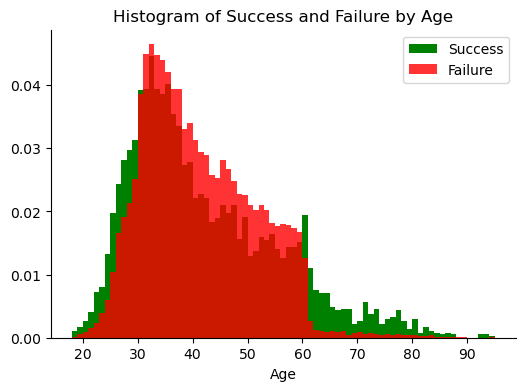

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

plt.hist(success, bins=np.arange(min(success), max(success) + 1, 1), color='green', label='Success', density=True)
plt.hist(fail, bins=np.arange(min(fail), max(fail) + 1, 1), color='red', alpha=0.8, label='Failure', density=True)

plt.xlabel('Age')
plt.title('Histogram of Success and Failure by Age')
plt.legend()
for direction in ['top', 'right']: 
    ax.spines[direction].set_visible(False)
plt.show()

The failure rate is higher in the 30-60 age range. Outside of this range, success rates are higher. This suggests focusing efforts on the two groups: those **under 30** and **those over 60**.

In [30]:
days_accumulated = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

data['day_num'] = data['day'] + data['month_no'].apply(lambda x: days_accumulated[x - 1])

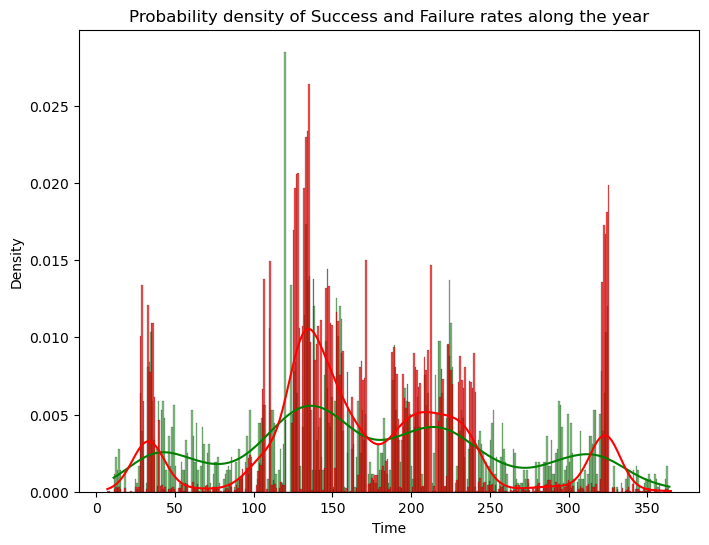

In [31]:
success = data[data['target'] == 'yes']['day_num']
fail = data[data['target'] == 'no']['day_num']

fig = plt.figure(figsize = (8,6))
sns.histplot(success, bins = 365, kde = True, color = 'green', stat='density') 
sns.histplot(fail, bins = 365,  alpha = 0.7, kde = True, color = 'red', stat='density')
plt.xlabel('Time') 
plt.title('Probability density of Success and Failure rates along the year')
#plt.grid(True)
plt.show()


# plt.figure(figsize=(10, 6))

# sns.kdeplot(success, color='green', label='Success', fill=True)
# sns.kdeplot(fail, color='red', label='Failure', fill=True)
# plt.xlabel('Time') 
# plt.title('Probability density of Success and Failure rates along the year')
# plt.grid(True)
# plt.show()

There are blank days, which I assume are weekends when no work is done.

The number of contacts significantly increases in February, May, June, July, August, and November (Black Friday week). During these times, the failure rate is high, surpassing the success rate. This could be due to a strategic shift towards reaching out more to new customers in an effort to attract them.

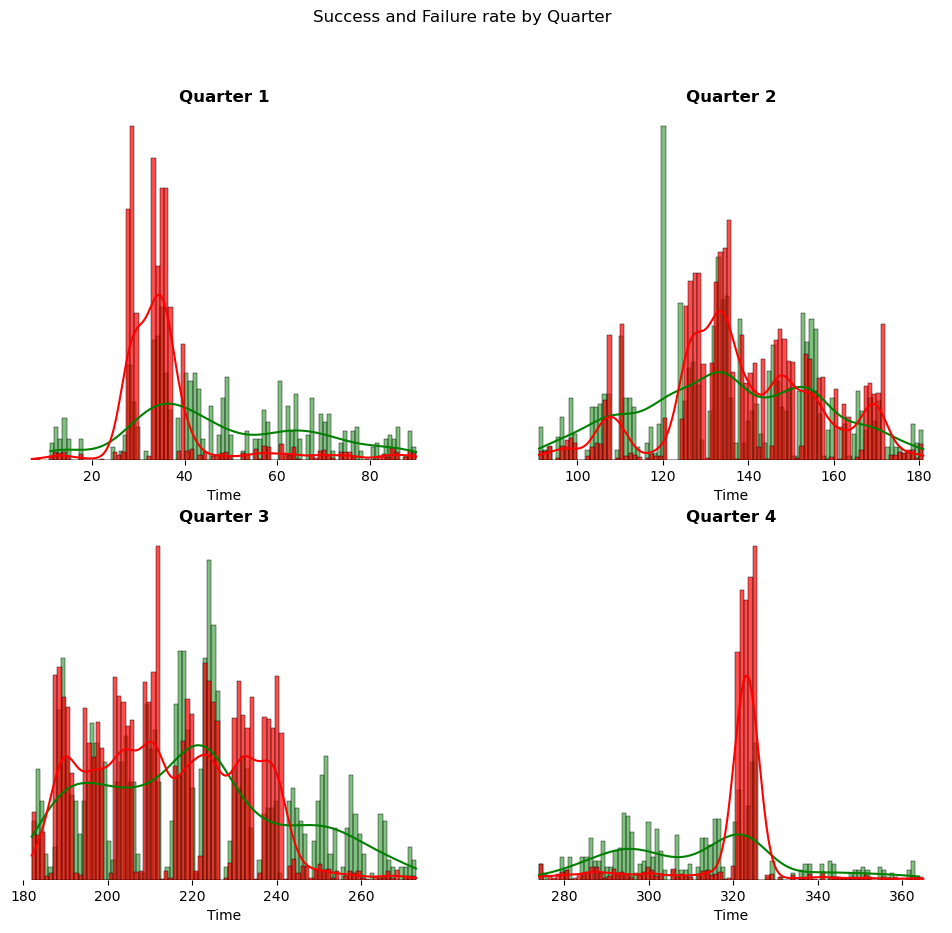

In [32]:
q1 = data[data['month_no'].isin([1, 2, 3])].copy()
q2 = data[data['month_no'].isin([4, 5, 6])].copy()
q3 = data[data['month_no'].isin([7, 8, 9])].copy()
q4 = data[data['month_no'].isin([10, 11, 12])].copy()

success1 = q1[q1['target'] == 'yes']['day_num']
fail1 = q1[q1['target'] == 'no']['day_num']

success2 = q2[q2['target'] == 'yes']['day_num']
fail2 = q2[q2['target'] == 'no']['day_num']

success3 = q3[q3['target'] == 'yes']['day_num']
fail3 = q3[q3['target'] == 'no']['day_num']

success4 = q4[q4['target'] == 'yes']['day_num']
fail4 = q4[q4['target'] == 'no']['day_num']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(success1, bins=90, kde=True, color='green', stat='density', ax=ax1) 
sns.histplot(fail1, bins=90, kde=True, color='red', alpha=0.7, stat='density', ax=ax1)
ax1.set_xlabel('Time') 
ax1.set_title('Quarter 1', weight = 'bold')

sns.histplot(success2, bins=91, kde=True, color='green', stat='density', ax=ax2) 
sns.histplot(fail2, bins=90, kde=True, color='red', alpha=0.7, stat='density', ax=ax2)
ax2.set_xlabel('Time') 
ax2.set_title('Quarter 2', weight = 'bold')

sns.histplot(success3, bins=92, kde=True, color='green', stat='density', ax=ax3) 
sns.histplot(fail3, bins=90, kde=True, color='red', alpha=0.7, stat='density', ax=ax3)
ax3.set_xlabel('Time') 
ax3.set_title('Quarter 3', weight = 'bold')

sns.histplot(success4, bins=92, kde=True, color='green', stat='density', ax=ax4) 
sns.histplot(fail4, bins=90, kde=True, color='red', alpha=0.7, stat='density', ax=ax4)
ax4.set_xlabel('Time') 
ax4.set_title('Quarter 4', weight = 'bold')

axes = [ax1, ax2, ax3, ax4]
for ax in axes: 
    for direction in ['left', 'right', 'top', 'bottom']: 
        ax.spines[direction].set_visible(False)
    ax.set_yticks([])
    ax.set_ylabel('')
plt.suptitle('Success and Failure rate by Quarter')
plt.show()

* Quarter 1: The last three weeks of January and the beginning of February mark a peak campaign period with a high number of contacts but a high failure rate. However, in February and March, even though the number of contacts decreases, the success rate is higher.

* Quarter 2: May is the peak month of the quarter and the year. However, the success rate is not high, possibly due to targeting the wrong customers.

* Quarter 3: Similar to Quarter 2, the success rate lags behind failure, with a very high failure rate.

* Quarter 4: Campaign activities decrease, but there is a spike in November (including Black Friday).

### Segmentation 

In [33]:
data['lastCampaignResult'].value_counts()

unknown    25746
failure     3403
other       1294
success     1037
Name: lastCampaignResult, dtype: int64

Divide the current dataset into customer groups as follows:

* **Super Positive Customers**: Customers who accepted both the previous and current campaigns.
* **New Positive Customers**: Customers who did not participate in the previous campaign but accepted the current campaign.
* **Negative to Positive Customers**: Customers who rejected the previous campaign but had a positive response to the current campaign.
* **Positive to Negative Customers**: Customers who accepted the previous campaign but had a negative response to the current campaign.
* **New Negative Customers**: Customers who did not participate in the previous campaign and rejected the current campaign.
* **Super Negative Customers**: Customers who rejected both the previous and current campaigns.
* **Unknown Customers**: Customers who do not fit into any of the above categories.

In [34]:
data['group'] = 'unknown' 
data.loc[(data['target'] == 'yes') & (data['lastCampaignResult'] == 'success'), 'group'] = 'super positive'
data.loc[(data['target'] == 'yes') & (data['lastCampaignResult'] == 'unknown'), 'group'] = 'new positive'
data.loc[(data['target'] == 'yes') & (data['lastCampaignResult'] == 'failure'), 'group'] = 'negative to positive'
data.loc[(data['target'] == 'no') & (data['lastCampaignResult'] == 'success'), 'group'] = 'positive to negative'
data.loc[(data['target'] == 'no') & (data['lastCampaignResult'] == 'unknown'), 'group'] = 'new negative'
data.loc[(data['target'] == 'no') & (data['lastCampaignResult'] == 'failure'), 'group'] = 'super negative'

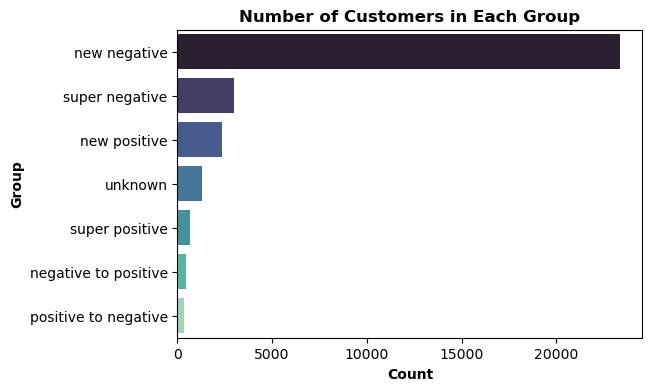

In [46]:
#colors = ['#97B5DA', '#DE71AB', '#80CCE9', '#C688BA', '#F55A9B', '#68E3F9', '#AF9FCA']
plt.figure(figsize=(6,4))
sns.countplot(y='group', data=data, order=data['group'].value_counts().index, palette='mako')

plt.title('Number of Customers in Each Group', fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Group', fontweight='bold')

plt.show()

The group with the largest number is **new negative**, followed by **super negative** and **new positive**.

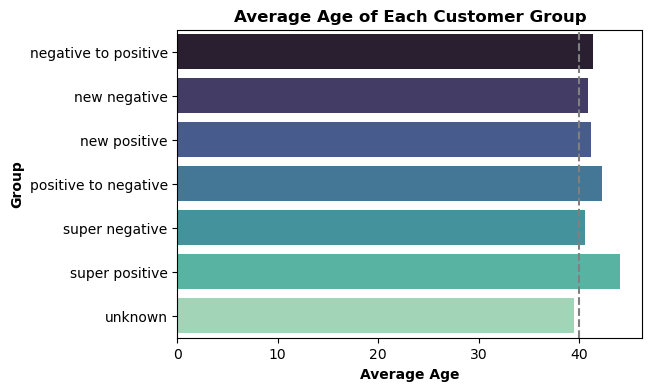

In [44]:
avg_age = data.groupby('group')['age'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='age', y='group', data=avg_age, palette='mako', order=avg_age['group'])

plt.title('Average Age of Each Customer Group', fontweight='bold')
plt.xlabel('Average Age', fontweight='bold')
plt.ylabel('Group', fontweight='bold')

plt.axvline(x=40, color='grey', linestyle='--')

plt.show()

The average age across all groups is over 40. The *super positive* group has the highest average age, indicating that the clients of the campaign is no longer young.

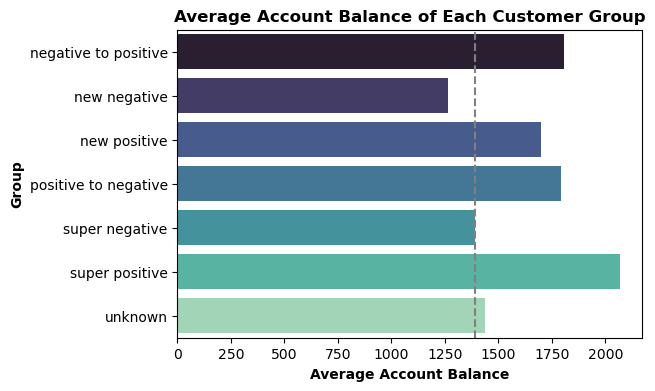

In [47]:
avg_balance = data.groupby('group')['accountBalance'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='accountBalance', y='group', data=avg_balance, palette='mako', order=avg_balance['group'])

plt.title('Average Account Balance of Each Customer Group', fontweight='bold')
plt.xlabel('Average Account Balance', fontweight='bold')
plt.ylabel('Group', fontweight='bold')

plt.axvline(x=1390, color='grey', linestyle='--')

plt.show()

The *super positive* group is the wealthiest. This suggests that the customer base is predominantly middle-aged and financially well-off.

### Super positive vs. Super negative

<Figure size 300x200 with 0 Axes>

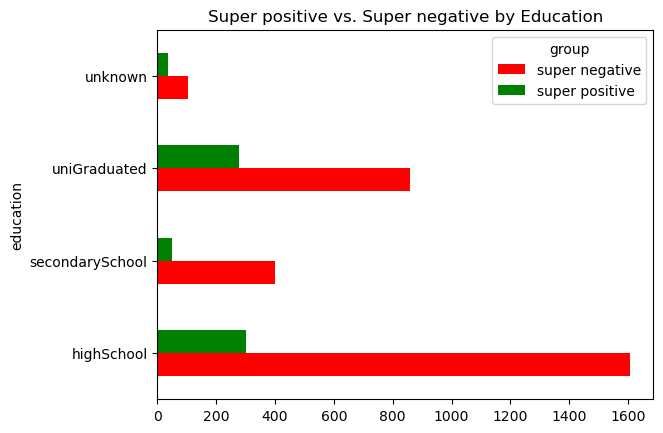

In [48]:
super_group = data[data['group'].isin(['super positive', 'super negative'])]
edu = super_group.groupby(['education', 'group']).size().unstack()

fig = plt.figure(figsize = (3,2))
edu.plot(kind = 'barh', width = 0.5, color = ['red', 'green'] )
plt.title('Super positive vs. Super negative by Education')
plt.show()

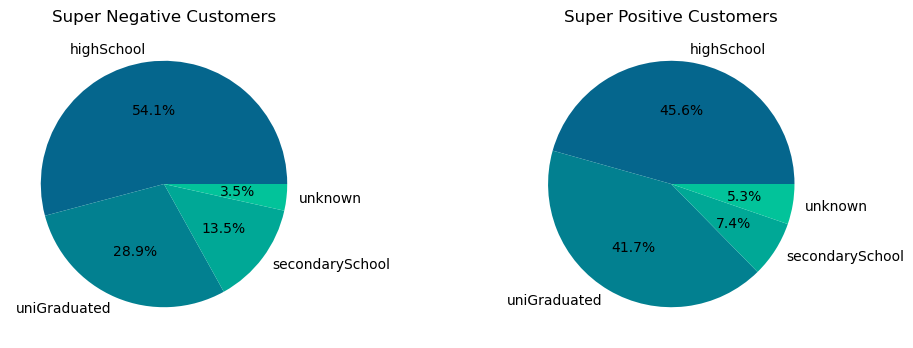

In [53]:
negative = super_group[super_group['group'] == 'super negative']
neg = negative['education'].value_counts()

positive = super_group[super_group['group'] == 'super positive']
pos = positive['education'].value_counts()

label = ['highSchool', 'uniGraduated', 'secondarySchool', 'unknown']
colr = ['#05668d', '#028090', '#00a896', '#02c39a']

fig,(ax1, ax2) = plt.subplots(1,2, figsize = (12,4) )
ax1.pie(neg, colors = colr, labels = label, autopct='%1.1f%%')
ax1.set_title('Super Negative Customers') 

ax2.pie(pos, colors = colr, labels = label, autopct='%1.1f%%')
ax2.set_title('Super Positive Customers')

plt.show()

Most Super Negative clients (54.15%) have a high school certificate, while a larger percentage of Super Positive customers (41.72%) have academic degrees, compared to 28.91% among Super Negative clients.

<Figure size 300x200 with 0 Axes>

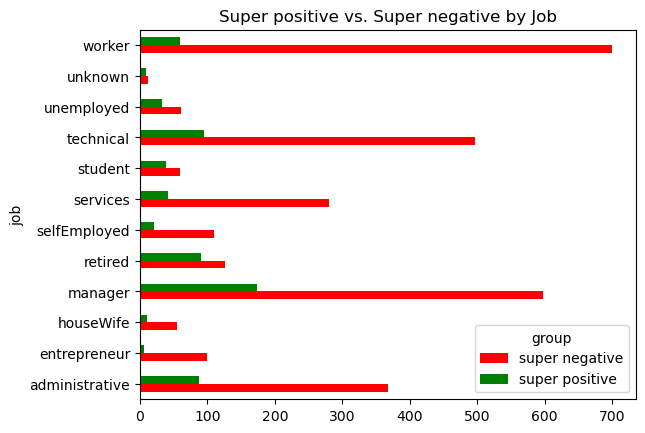

In [33]:
job = super_group.groupby(['job', 'group']).size().unstack()

fig = plt.figure(figsize = (3,2))
job.plot(kind = 'barh', width = 0.5, color = ['red', 'green'])
plt.title('Super positive vs. Super negative by Job')
plt.show()

As observed, 'manager' is the most common occupation among Super Positive Customers, while 'worker' is the most common among Super Negative clients.

## Conclusion

* Different age groups respond differently. Younger and older customers tend to engage more successfully compared to those in the middle age bracket. This suggests our middle-aged audience might need more tailored messaging.
* Success rates fluctuate across months and quarters. Surprisingly, high contact periods like May and November don't always mean high success rates. This could mean we're bombarding customers or mistiming our campaigns.
* Sorting customers by past campaign responses reveals clear behavior patterns. Some groups, like Super Positive and Super Negative, stand out with distinct demographics and responses, hinting at future behavior trends.
* There's a link between a customer's occupation/education and their response to campaigns. Managers and highly educated individuals tend to respond better, perhaps due to disposable income or media habits.
* The way we reach out seems to have little impact on campaign success. This suggests our focus should be on content and targeting rather than the channel used.

## Recommendations

* Create separate campaigns for different age brackets, aligning messages with each group's preferences and media habits.
* Adjust campaign timing based on historical success rates, reducing contact during low-engagement periods and focusing more on high-performing months.
* Utilize past response data to fine-tune campaigns, prioritizing loyal customers and trying new approaches for less engaged groups.